### 1 Импортирование необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2. Импорт данных

In [2]:
from pandas.core.frame import DataFrame
from typing import List
file_paths = [
    "set_1.csv",  
    "set_2.csv", 
    "set_3.csv"  
]

datasets: List[np.ndarray] = [] 
for index, file_path in enumerate(file_paths):
    datasets.append(pd.read_csv(file_path, sep=',', encoding='utf-8', na_values=['', ' '], dtype=float,  header=None).values.flatten() )
    print(f"Загружено {index+1} файл")


# Проверка загруженный данных
for i, df in enumerate(datasets):
    if df is not None:
        print(f"Удачно загружены данные из {file_paths[i]} количество элементов: {len(df)}") 
    else:
       print(f"\nДанные из файла {file_paths[i]} не были загружены.")

Загружено 1 файл
Загружено 2 файл
Загружено 3 файл
Удачно загружены данные из set_1.csv количество элементов: 100000
Удачно загружены данные из set_2.csv количество элементов: 10000
Удачно загружены данные из set_3.csv количество элементов: 100000


### 3 Обнаружение и удаления выбросов

In [3]:
def z_score_cleaning(data: np.ndarray, threshold: float = 3.0) -> np.ndarray:
    mean = np.sum(data) / len(data) 
    variance = np.sum((data - mean) ** 2) / len(data)
    std_dev = variance ** 0.5
    z_scores = (data - mean) / std_dev
    cleaned_data = data[np.abs(z_scores) <= threshold]
    return cleaned_data


for i, data in enumerate(datasets):
    datasets[i] = z_score_cleaning(data)
    print(f"Длина датасета {i+1} после очисти методом Z-оценки: {len(datasets[i])}")
print("Очиста методом Z-оценки прошла успешно")

Длина датасета 1 после очисти методом Z-оценки: 98297
Длина датасета 2 после очисти методом Z-оценки: 9865
Длина датасета 3 после очисти методом Z-оценки: 98252
Очиста методом Z-оценки прошла успешно


### 4 Анализ данных и построение гистограмм

Для набора данных 1:
  Математическое ожидание: 3.1911350295532928
  Дисперсия: 5.865804196107233

12


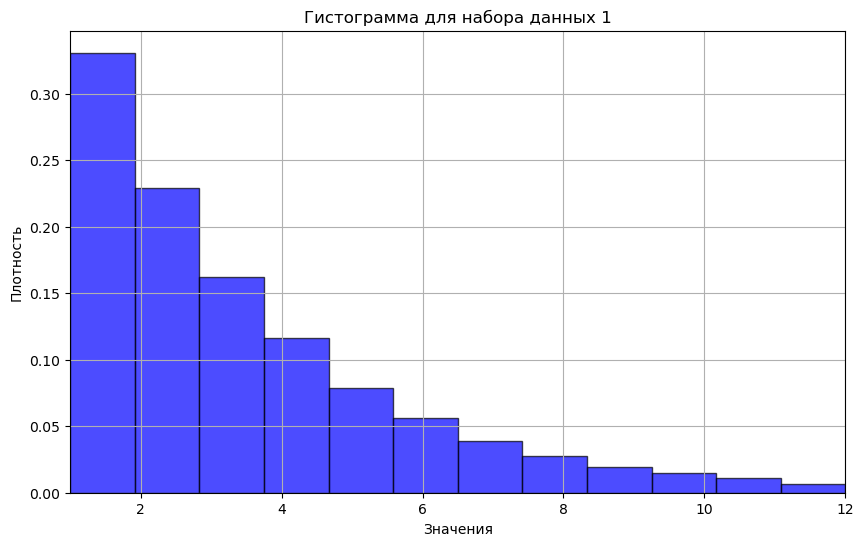

Для набора данных 2:
  Математическое ожидание: 20.330126987937152
  Дисперсия: 7471.888867374877

328


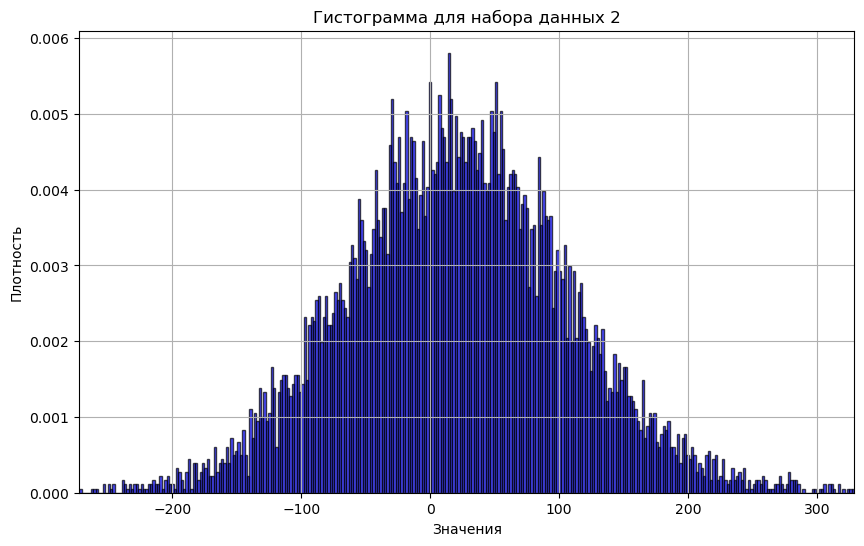

Для набора данных 3:
  Математическое ожидание: 0.11968213108130114
  Дисперсия: 0.01263736684962422

20


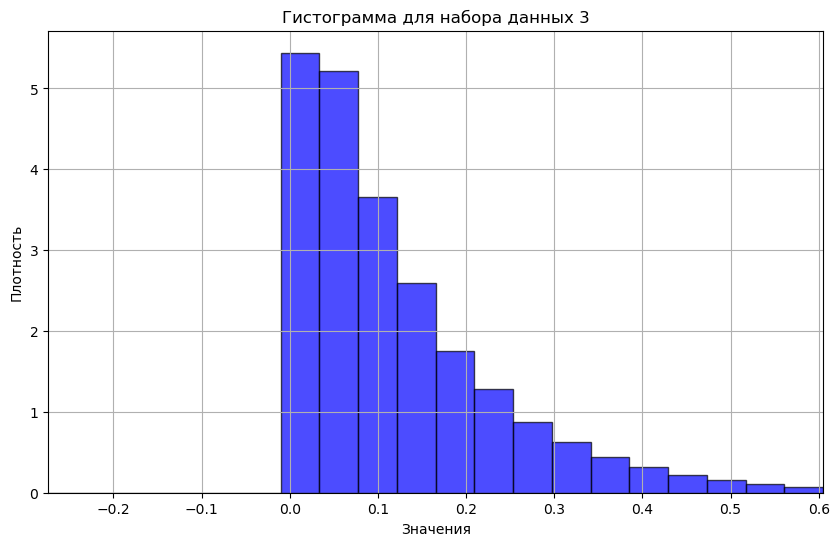

In [4]:
means: List[float] = []
variances: List[float] = []    
    
def get_bins(data):
    mx = np.max(data)
    if mx < 1:
        return 20
    return int(np.max(data))

for i, data in enumerate(datasets):
    mean = np.sum(data) / len(data)  # Математическое ожидание
    variance = np.sum((data - mean) ** 2) / len(data)  # Дисперсия
    means.append(mean)
    variances.append(variance)
    # Вывод результатов
    print(f"Для набора данных {i + 1}:")
    print(f"  Математическое ожидание: {mean}")
    print(f"  Дисперсия: {variance}\n")

    print(get_bins(data))
    
    # Построение гистограммы
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=get_bins(data), density=True, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Гистограмма для набора данных {i + 1}')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.xlim(data.min(), data.max())  # Устанавливаем границы по минимуму и максимуму значений
    plt.grid()
    plt.show()
    

### 5 Реализация теоретических распределений

In [5]:
def geometric_distribution(mean, variance, size):
    """Генерирует выборку из геометрического распределения с использованием векторных операций."""
    if mean <= 1 or variance < 0:
        print("Недопустимые параметры: mean > 1 и variance >= 0.")
        return np.array([])

    p = 1 / mean
    u = np.random.rand(size)
    samples = np.floor(np.log(u) / np.log(1 - p)) + 1

    return samples.astype(int)


def binomial_distribution(mean, variance, size):
    """Генерирует выборку из биномиального распределения с использованием параметров mean и variance."""

    # Решение уравнений для n и p
    try:
        n = round(mean**2 / (mean - variance))
        p = (mean - variance) / mean
    except ZeroDivisionError:
        print("Невозможно определить параметры распределения.")
        return np.array([])

    if n <= 0 or p < 0 or p > 1:
        print("Недопустимые значения n или p для биномиального распределения.")
        return np.array([])

    return np.random.binomial(n, p, size)


def poisson_distribution(mean, variance, size):
    """Генерирует выборку из распределения Пуассона."""

    return np.random.poisson(mean, size)


def uniform_distribution(mean, variance, size):
    """Генерирует выборку из равномерного распределения."""

    a = mean - np.sqrt(3 * variance)
    b = mean + np.sqrt(3 * variance)

    return np.random.uniform(a, b, size)

def normal_distribution(mean, variance, size):
    """Генерирует выборку из нормального распределения."""
    if variance <= 0:
        print("Недопустимые параметры: variance должно быть положительным.")
        return np.array([])

    return np.random.normal(mean, np.sqrt(variance), size)


def exponential_distribution(mean, variance, size):
    """Генерирует выборку из экспоненциального распределения."""
    
    return np.random.exponential(scale=mean, size=size)

### 6. Построение гистограмм для теоретических распределений


Набор данных 1 - сгенерированные распределения:
Недопустимые значения n или p для биномиального распределения.


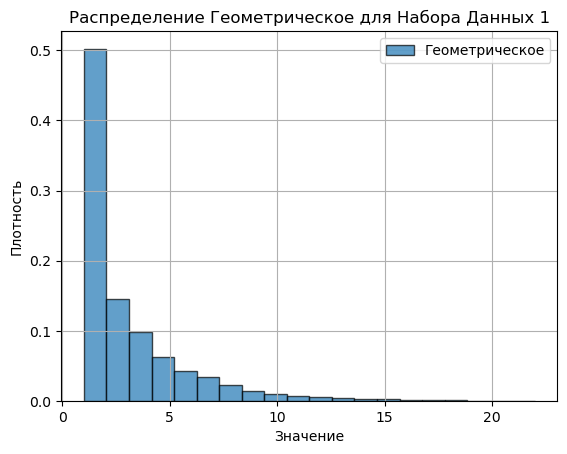

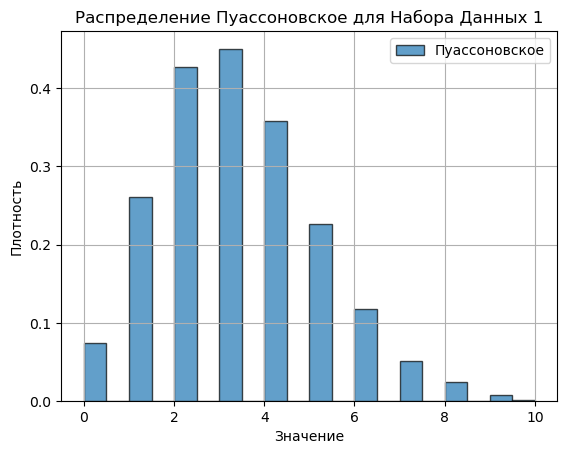

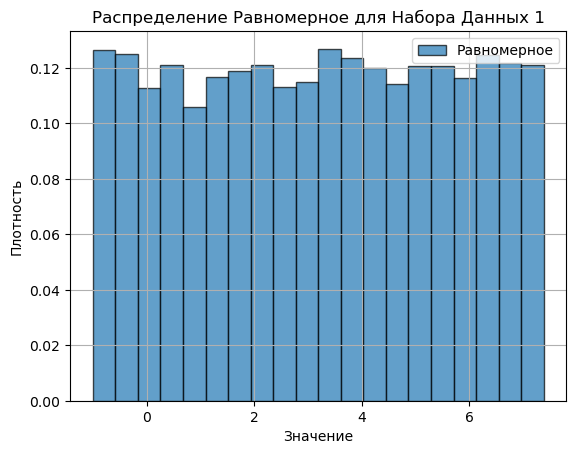

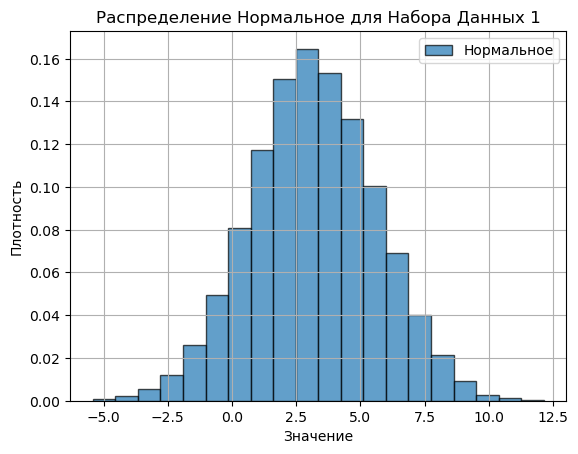

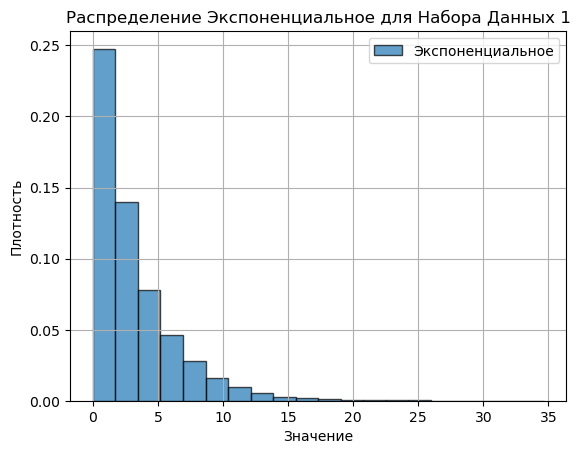


Набор данных 2 - сгенерированные распределения:
Недопустимые значения n или p для биномиального распределения.


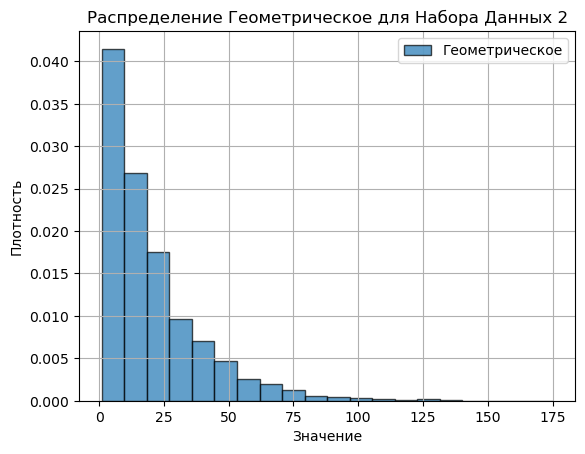

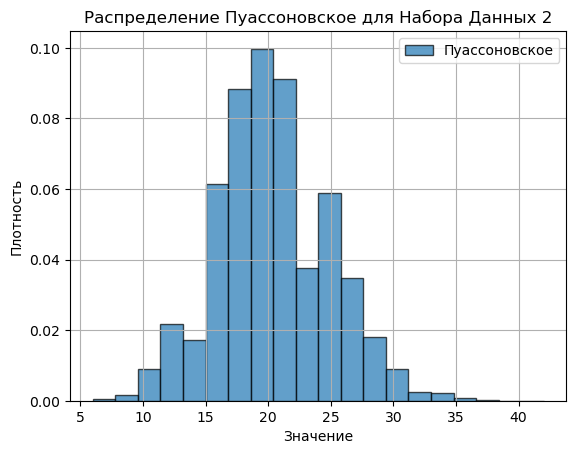

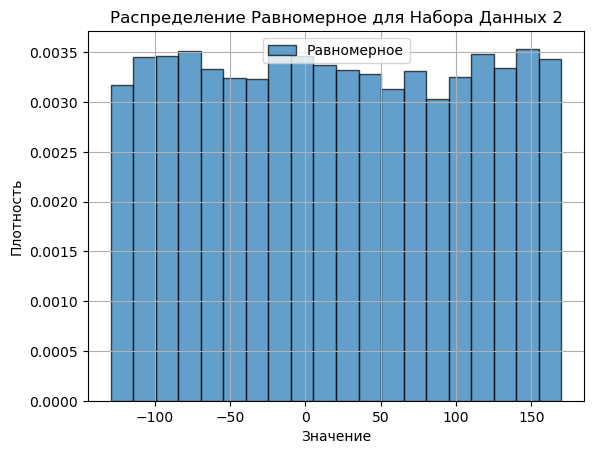

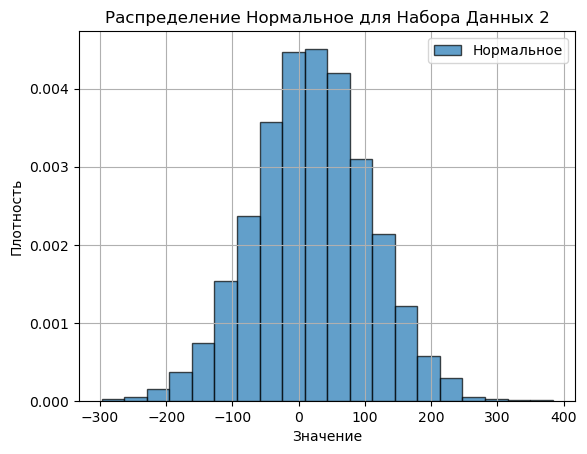

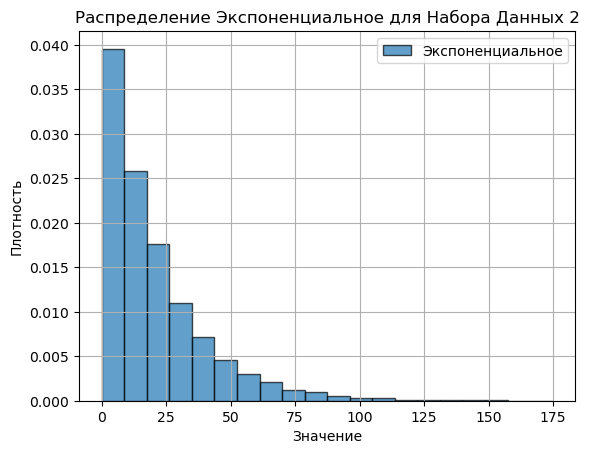


Набор данных 3 - сгенерированные распределения:
Недопустимые параметры: mean > 1 и variance >= 0.
Недопустимые значения n или p для биномиального распределения.


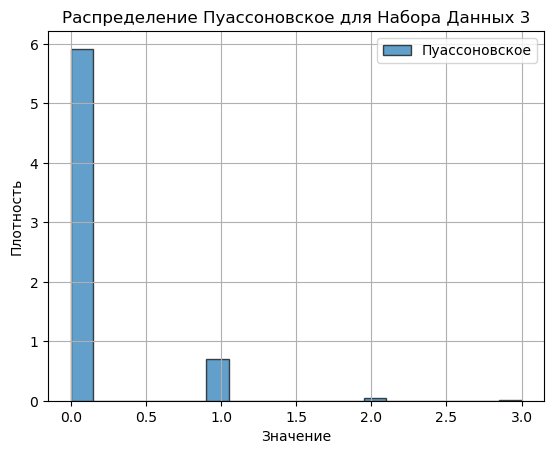

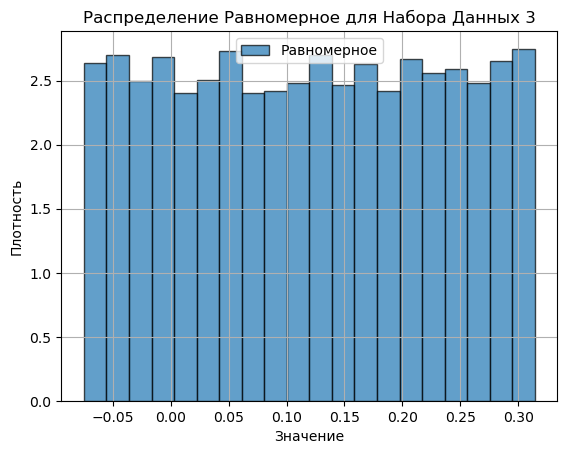

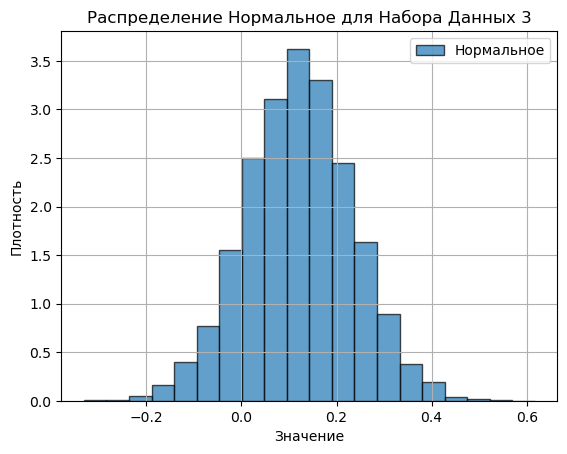

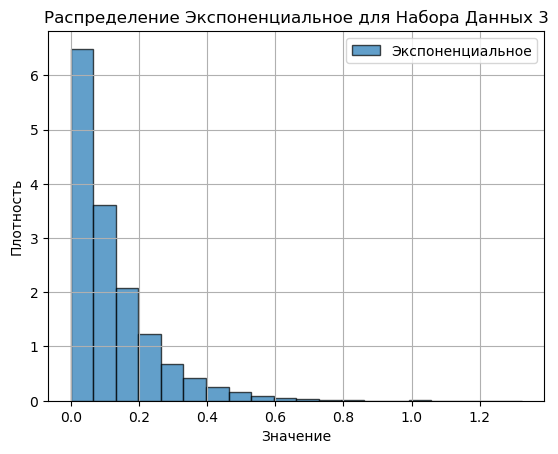

Генерация распределений завершена.


In [6]:
for i in range(len(means)):
    print(f"\nНабор данных {i + 1} - сгенерированные распределения:")
    mean = means[i]
    variance = variances[i]
    size = 10000  # Количество образцов для генерации

    # Генерация распределений
    geometric_data = geometric_distribution(mean, variance, size)
    binomial_data = binomial_distribution(mean, variance, size)
    poisson_data = poisson_distribution(mean, variance, size)
    uniform_data = uniform_distribution(mean, variance, size)
    normal_data = normal_distribution(mean, variance, size)
    exponential_data = exponential_distribution(mean, variance, size)

    # Подготовка к визуализации гистограмм для каждого распределения
    distributions = {
        "Геометрическое": geometric_data,
        "Биномиальное": binomial_data,
        "Пуассоновское": poisson_data,
        "Равномерное": uniform_data,
        "Нормальное": normal_data,
        "Экспоненциальное": exponential_data,
    }

    for dist_name, dist_data in distributions.items():
        if dist_data.size == 0:  # Пропустить, если данные пустые
            continue

        plt.hist(
            dist_data,
            bins=20,
            density=True,
            alpha=0.7,
            label=dist_name,
            edgecolor="black",
        )
        plt.title(f"Распределение {dist_name} для Набора Данных {i + 1}")
        plt.xlabel("Значение")
        plt.ylabel("Плотность")
        plt.grid()
        plt.legend()
        plt.show()

print("Генерация распределений завершена.")

### 7. Сопоставление и анализ

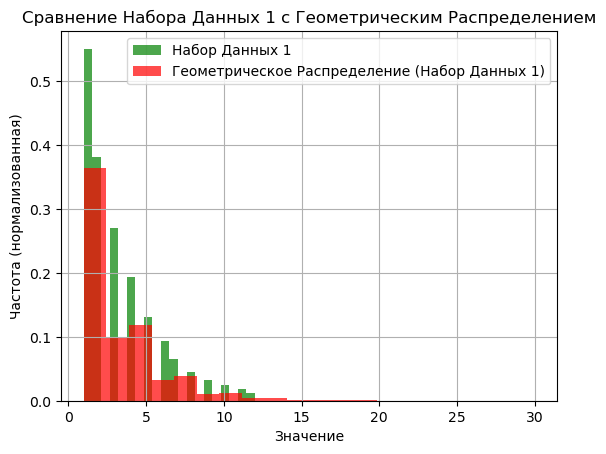

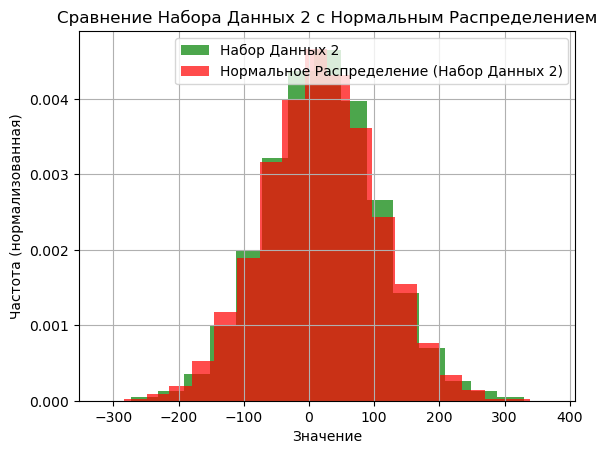

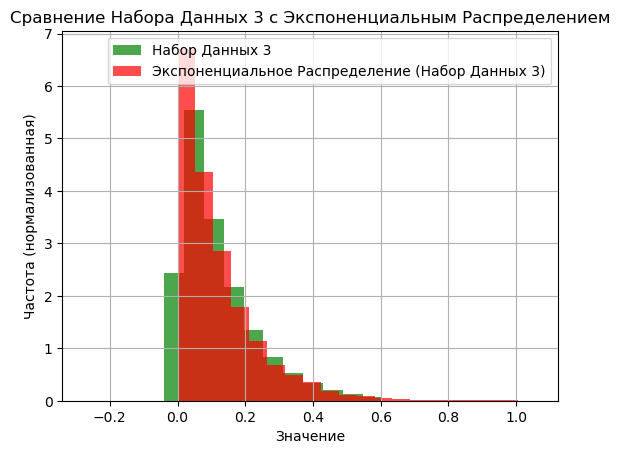

In [7]:
def comparison_with_geometric_distribution():
    mean = means[0]
    variance = variances[0]
    samples = geometric_distribution(mean, variance, 10000)

    plt.hist(datasets[0], bins=20, density=True, alpha=0.7, color="green", label="Набор Данных 1")

    plt.hist(
        samples,
        bins=20,
        density=True,
        alpha=0.7,
        color="red",
        label="Геометрическое Распределение (Набор Данных 1)",
    )

    plt.title(f"Сравнение Набора Данных 1 с Геометрическим Распределением")
    plt.xlabel("Значение")
    plt.ylabel("Частота (нормализованная)")
    plt.legend()
    plt.grid()
    plt.show()

def comparison_with_normal_distribution():
    mean = means[1]
    variance = variances[1]
    samples = normal_distribution(mean, variance, 10000)

    plt.hist(datasets[1], bins=15, density=True, alpha=0.7, color="green", label="Набор Данных 2")

    plt.hist(
        samples,
        bins=20,
        density=True,
        alpha=0.7,
        color="red",
        label="Нормальное Распределение (Набор Данных 2)",
    )

    plt.title(f"Сравнение Набора Данных 2 с Нормальным Распределением")
    plt.xlabel("Значение")
    plt.ylabel("Частота (нормализованная)")
    plt.legend()
    plt.grid()
    plt.show()

def comparison_with_exponential_distribution():
    mean = means[2]
    variance = variances[2]
    samples = exponential_distribution(mean, variance, 10000)

    plt.hist(datasets[2], bins=15, density=True, alpha=0.7, color="green", label="Набор Данных 3")

    plt.hist(
        samples,
        bins=20,
        density=True,
        alpha=0.7,
        color="red",
        label="Экспоненциальное Распределение (Набор Данных 3)",
    )

    plt.title(f"Сравнение Набора Данных 3 с Экспоненциальным Распределением")
    plt.xlabel("Значение")
    plt.ylabel("Частота (нормализованная)")
    plt.legend()
    plt.grid()
    plt.show()

# Вызовы функций сравнения
comparison_with_geometric_distribution()
comparison_with_normal_distribution()
comparison_with_exponential_distribution()